### Importing library and data

In [5]:
import pandas as pd
import import_ipynb
from data_cleaning import df_locations

In [6]:
df_trip = pd.read_csv('/home/jabez/Documents/week_8/Logistic-optimization-Delivery-drivers-location-optimisation-with-Causal-Inference-/data/df_trip_processed.csv')

In [7]:
df_trip = df_trip.drop(columns=['Unnamed: 0'])

### Exploring Trip data

In [ ]:
df_trip

In [10]:
lon_mean = df_trip['lon_org'].mean()
lat_mean = df_trip['lat_org'].mean()

In [15]:
from math import radians, cos, sin, sqrt, atan2

from math import radians, sin, cos, sqrt, atan2
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate the differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Calculate the distance using the Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

In [16]:
df_trip['distance_to_centroid_km'] = df_trip.apply(lambda row: haversine_distance(row['lat_org'], row['lon_org'], lat_mean, lon_mean), axis=1)

In [22]:
df_locations

,id,order_id,driver_id,driver_action,lat,lng
0,1,392001,243828,accepted,6.602207,3.270465
1,2,392001,243588,rejected,6.592097,3.287445
2,3,392001,243830,rejected,6.596133,3.281784
3,4,392001,243539,rejected,6.596142,3.280526
4,5,392001,171653,rejected,6.609232,3.288800
...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877
1557736,1557737,517948,245447,rejected,6.425431,3.527358
1557737,1557738,517948,239866,rejected,6.440013,3.525378
1557738,1557739,517948,243774,rejected,6.469036,3.566877


/tmp/ipykernel_77008/2248897838.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='lat_org', y='lon_org', data=df_trip, palette=['purple', 'orange'])  #


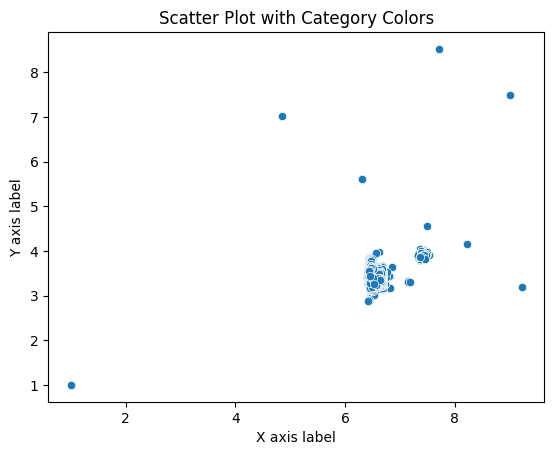

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.scatterplot(x='lat_org', y='lon_org', data=df_trip, palette=['purple', 'orange'])  #
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Scatter Plot with Category Colors')
plt.show()

In [37]:
import folium
from folium.plugins import MarkerCluster
# Specify the center of the map
center_lat = df_trip['lat_org'].mean()
center_lon = df_trip['lon_org'].mean()

# Create a map centered around the mean latitude and longitude
map = folium.Map(location=[center_lat, center_lon], zoom_start=10)
# Add markers for each pickup location
for index, row in df_trip.iterrows():
    folium.Marker([row['lat_org'], row['lon_org']], popup=f"Trip ID: {row['Trip ID']}").add_to(map)

map.save("map.html")  # Save the map as an HTML file
map  # Display the map in Jupyter Notebook


In [33]:
df_locations['order_id'].nunique()

26492

In [34]:
df_locations

,id,order_id,driver_id,driver_action,lat,lng
0,1,392001,243828,accepted,6.602207,3.270465
1,2,392001,243588,rejected,6.592097,3.287445
2,3,392001,243830,rejected,6.596133,3.281784
3,4,392001,243539,rejected,6.596142,3.280526
4,5,392001,171653,rejected,6.609232,3.288800
...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877
1557736,1557737,517948,245447,rejected,6.425431,3.527358
1557737,1557738,517948,239866,rejected,6.440013,3.525378
1557738,1557739,517948,243774,rejected,6.469036,3.566877


/home/jabez/Documents/week_8/Logistic-optimization-Delivery-drivers-location-optimisation-with-Causal-Inference-/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


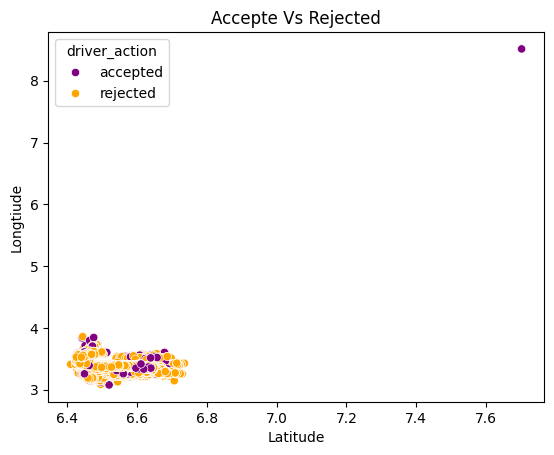

In [24]:
sns.scatterplot(x='lat', y='lng', hue='driver_action', data=df_locations, palette=['purple', 'orange'])  # Adjust palette to match categories
plt.xlabel('Latitude')
plt.ylabel('Longtiude')
plt.title('Accepte Vs Rejected')
plt.show()

In [ ]:
colors = ['red', 'blue', 'green', 'purple', 'orange']  # List of colors

# Scatter Plot with Colors
plt.scatter(df_trip[''], df2['Y'], color=colors)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Scatter Plot with Different Colors from Different DataFrames')
plt.show()

/home/jabez/Documents/week_8/Logistic-optimization-Delivery-drivers-location-optimisation-with-Causal-Inference-/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


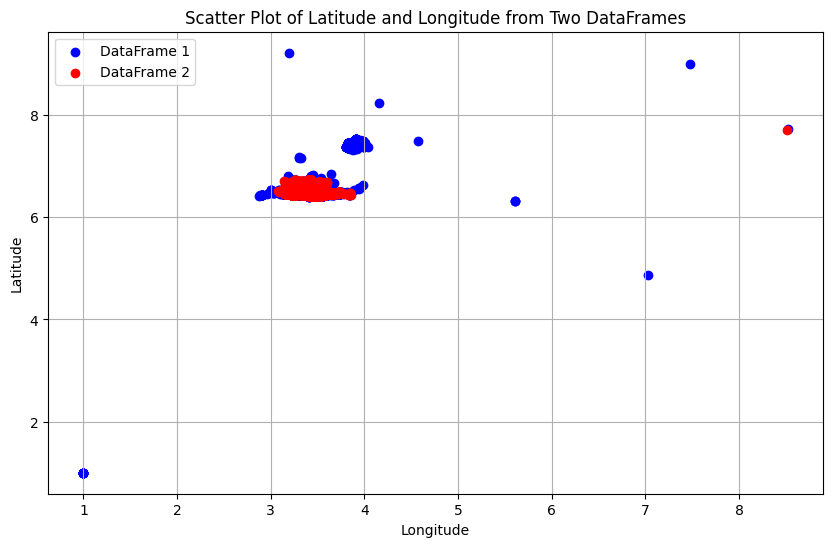

In [25]:
plt.figure(figsize=(10, 6))

# Scatter plot for the first dataframe
plt.scatter(df_trip['lon_org'], df_trip['lat_org'], color='blue', label='Accepted')

# Scatter plot for the second dataframe
plt.scatter(df_locations['lng'], df_locations['lat'], color='red', label='Rejected')

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude from Two DataFrames')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [20]:
df_rejected = df_locations[df_locations['driver_action'] == 'rejected']
rejection_counts = df_rejected.groupby(['order_id', 'lat', 'lng']).size().reset_index(name='rejection_count')
sorted_rejection_counts = rejection_counts.sort_values(by='rejection_count', ascending=False)
sorted_rejection_counts.head(20)

,order_id,lat,lng,rejection_count
211677,415800,6.544298,3.362667,173
94387,401129,6.524689,3.384099,99
94484,401129,6.541203,3.377473,99
145563,406150,6.558767,3.340308,88
145550,406150,6.551414,3.340012,88
145542,406150,6.538358,3.332283,88
94548,401129,6.544405,3.363869,81
94298,401129,6.511266,3.377688,81
94492,401129,6.543694,3.362664,81
94497,401129,6.544186,3.363415,81


In [25]:
average_lat = df_rejected['lat'].mean()
average_lon = df_rejected['lng'].mean()
average_lat


6.536165040987763

In [26]:
df_rejected

,id,order_id,driver_id,driver_action,lat,lng
1,2,392001,243588,rejected,6.592097,3.287445
2,3,392001,243830,rejected,6.596133,3.281784
3,4,392001,243539,rejected,6.596142,3.280526
4,5,392001,171653,rejected,6.609232,3.288800
5,6,392001,245662,rejected,6.593095,3.287759
...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877
1557736,1557737,517948,245447,rejected,6.425431,3.527358
1557737,1557738,517948,239866,rejected,6.440013,3.525378
1557738,1557739,517948,243774,rejected,6.469036,3.566877


In [24]:
from math import radians, sin, cos, sqrt, atan2
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate the differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Calculate the distance using the Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

In [27]:
df_rejected['distance_to_centroid_km'] = df_rejected.apply(lambda row: haversine_distance(row['lat'], row['lng'], average_lat, average_lon), axis=1)

/tmp/ipykernel_20312/3498512863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejected['distance_to_centroid_km'] = df_rejected.apply(lambda row: haversine_distance(row['lat'], row['lng'], average_lat, average_lon), axis=1)


In [28]:
df_rejected

,id,order_id,driver_id,driver_action,lat,lng,distance_to_centroid_km
1,2,392001,243588,rejected,6.592097,3.287445,11.844979
2,3,392001,243830,rejected,6.596133,3.281784,12.612880
3,4,392001,243539,rejected,6.596142,3.280526,12.731508
4,5,392001,171653,rejected,6.609232,3.288800,12.830958
5,6,392001,245662,rejected,6.593095,3.287759,11.874188
...,...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877,22.088897
1557736,1557737,517948,245447,rejected,6.425431,3.527358,20.527175
1557737,1557738,517948,239866,rejected,6.440013,3.525378,19.414446
1557738,1557739,517948,243774,rejected,6.469036,3.566877,22.088897


In [ ]:
from scipy.stats import ttest_ind

# Get distances for accepted and rejected orders
accepted_distances = df[df['driver_action'] == 'accepted']['distance_from_mean']
rejected_distances = df[df['driver_action'] == 'rejected']['distance_from_mean']

# Perform t-test
t_stat, p_value = ttest_ind(accepted_distances, rejected_distances)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

In [29]:
import matplotlib.pyplot as plt

plt.hist(df_rejected['distance_km'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Distance for Rejected Orders')
plt.show()

KeyError: 'distance_km'

In [3]:
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 71.3+ MB


In [4]:
df_locations['driver_id'].nunique()

1213

1213 Drivers

In [4]:
status = df_locations['driver_action'].value_counts()
status

driver_action
rejected    1531837
accepted      25903
Name: count, dtype: int64

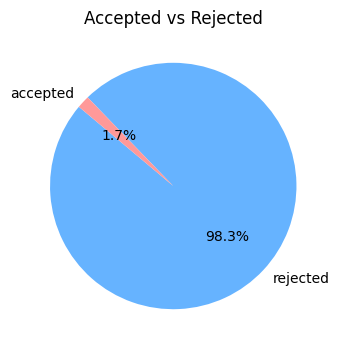

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Accepted vs Rejected')
plt.show()

In [14]:
df_trip

KeyError: '_oh'